<a href="https://www.kaggle.com/code/ridhisood/student-performance-data?scriptVersionId=188310770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df_train = pd.read_csv('/kaggle/input/student-performance-data/student_data.csv')
df_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
df_train['pass'] = df_train.apply(lambda row:1 if(row['G1']+row['G2']+row['G3'])>= 35 else 0,axis=1)
df_train = df_train.drop(['G1','G2','G3'],axis =1)
df_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0


In [24]:
df_train = pd.get_dummies(df_train,columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
df_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [25]:
df_train =df_train.sample(frac=1)
df_train_tr =df_train[:500]
df_test_te = df_train[500:]
df_train_att = df_train_tr.drop(['pass'],axis =1)
df_train_pass=df_train_tr['pass']
df_test_att = df_test_te.drop(['pass'],axis =1)
df_test_pass=df_test_te['pass']

df_tr_att = df_train.drop(['pass'],axis=1)
df_te = df_train['pass']

print("Passing : %d out of %d (%.2f%%)"%(np.sum(df_te),len(df_te),100*float(np.sum(df_te))/len(df_te)))


Passing : 166 out of 395 (42.03%)


In [26]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion = "entropy",max_depth = 5)
t = t.fit(df_tr_att,df_te)

In [27]:
export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                feature_names=list(df_train_att.columns), class_names=["fail", "pass"], filled=True, rounded=True)

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t,df_tr_att,df_te,cv=5)
print("Accuracy :%0.2f(+/- %0.2f)" % (scores.mean(),scores.std() * 2))

Accuracy :0.61(+/- 0.07)


In [29]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=max_depth)
    scores = cross_val_score(t,df_tr_att,df_te,cv=5)
    print("Max depth:%d,Accuracy: %0.2f(+/- %0.2f)"%(max_depth,scores.mean(),scores.std()*2))

Max depth:1,Accuracy: 0.58(+/- 0.01)
Max depth:2,Accuracy: 0.58(+/- 0.13)
Max depth:3,Accuracy: 0.56(+/- 0.06)
Max depth:4,Accuracy: 0.60(+/- 0.09)
Max depth:5,Accuracy: 0.60(+/- 0.06)
Max depth:6,Accuracy: 0.58(+/- 0.06)
Max depth:7,Accuracy: 0.60(+/- 0.12)
Max depth:8,Accuracy: 0.58(+/- 0.08)
Max depth:9,Accuracy: 0.58(+/- 0.11)
Max depth:10,Accuracy: 0.58(+/- 0.09)
Max depth:11,Accuracy: 0.58(+/- 0.11)
Max depth:12,Accuracy: 0.59(+/- 0.04)
Max depth:13,Accuracy: 0.62(+/- 0.09)
Max depth:14,Accuracy: 0.59(+/- 0.12)
Max depth:15,Accuracy: 0.59(+/- 0.09)
Max depth:16,Accuracy: 0.58(+/- 0.11)
Max depth:17,Accuracy: 0.57(+/- 0.06)
Max depth:18,Accuracy: 0.60(+/- 0.07)
Max depth:19,Accuracy: 0.59(+/- 0.10)


In [30]:
depth_acc = np.empty((19,3),float)
i =0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=max_depth)
    scores = cross_val_score(t,df_tr_att,df_te,cv=5)
    depth_acc[i,0]=max_depth
    depth_acc[i,1]=scores.mean()
    depth_acc[i,2]=scores.std()*2
    i += 1
    
    depth_acc

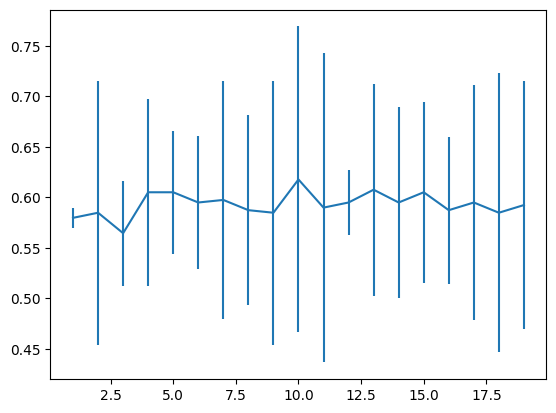

In [31]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.errorbar(depth_acc[:,0],depth_acc[:,1],yerr=depth_acc[:,2])
plt.show()